In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras

In [2]:
housing = fetch_california_housing() #loading the data
X_train_full , X_test , y_train_full , y_test = train_test_split(housing.data , housing.target) #training and testing set
X_train , X_valid , y_train , y_valid = train_test_split(X_train_full,y_train_full) #training and validation set

print(f"The size of training before splitting to valid is {X_train_full.shape}")
print(f"The size of testing before splitting to valid is {y_train_full.shape}")

print(f"The size of training after splitting to valid is {X_train.shape}")
print(f"The size of testing after splitting to valid is {y_train.shape}")

The size of training before splitting to valid is (15480, 8)
The size of testing before splitting to valid is (15480,)
The size of training after splitting to valid is (11610, 8)
The size of testing after splitting to valid is (11610,)


In [3]:
# scaling the features

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [4]:
model  = keras.models.Sequential([
    keras.layers.Dense(30,activation="relu",input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])


model.compile(loss="mean_squared_error" , optimizer="sgd",   metrics=[tf.keras.metrics.MeanSquaredError()])
history = model.fit(X_train,y_train,epochs=20,validation_data=(X_valid,y_valid))

Epoch 1/20
363/363 [==============================] - 2s 3ms/step - loss: 1.9056 - mean_squared_error: 1.9056 - val_loss: 0.5532 - val_mean_squared_error: 0.5532
Epoch 2/20
363/363 [==============================] - 0s 730us/step - loss: 0.5166 - mean_squared_error: 0.5166 - val_loss: 4.1788 - val_mean_squared_error: 4.1788
Epoch 3/20
363/363 [==============================] - 0s 714us/step - loss: 1.3842 - mean_squared_error: 1.3842 - val_loss: 0.4534 - val_mean_squared_error: 0.4534
Epoch 4/20
363/363 [==============================] - 0s 748us/step - loss: 0.4774 - mean_squared_error: 0.4774 - val_loss: 0.3870 - val_mean_squared_error: 0.3870
Epoch 5/20
363/363 [==============================] - 0s 712us/step - loss: 0.4140 - mean_squared_error: 0.4140 - val_loss: 0.3744 - val_mean_squared_error: 0.3744
Epoch 6/20
363/363 [==============================] - 0s 709us/step - loss: 0.3995 - mean_squared_error: 0.3995 - val_loss: 0.3673 - val_mean_squared_error: 0.3673
Epoch 7/20
363/363

In [5]:
#setting up tensorboard
import os
root_logdir = os.path.join(os.curdir,"mylogs")

def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H-%M_%S")
    return os.path.join(root_logdir,run_id)
run_logdir = get_run_logdir()

In [6]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train,y_train,epochs=20,validation_data=(X_valid,y_valid),callbacks=[tensorboard_cb])


Epoch 1/20
363/363 [==============================] - 1s 4ms/step - loss: 0.3621 - mean_squared_error: 0.3621 - val_loss: 0.3412 - val_mean_squared_error: 0.3412
Epoch 2/20
363/363 [==============================] - 0s 818us/step - loss: 0.3605 - mean_squared_error: 0.3605 - val_loss: 0.3379 - val_mean_squared_error: 0.3379
Epoch 3/20
363/363 [==============================] - 0s 777us/step - loss: 0.3624 - mean_squared_error: 0.3624 - val_loss: 0.3394 - val_mean_squared_error: 0.3394
Epoch 4/20
363/363 [==============================] - 0s 758us/step - loss: 0.3569 - mean_squared_error: 0.3569 - val_loss: 0.3350 - val_mean_squared_error: 0.3350
Epoch 5/20
363/363 [==============================] - 0s 790us/step - loss: 0.3542 - mean_squared_error: 0.3542 - val_loss: 0.3338 - val_mean_squared_error: 0.3338
Epoch 6/20
363/363 [==============================] - 0s 844us/step - loss: 0.3555 - mean_squared_error: 0.3555 - val_loss: 0.3337 - val_mean_squared_error: 0.3337
Epoch 7/20
363/363

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                270       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 31        
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [8]:
mse_test = model.evaluate(X_test,y_test)

162/162 [==============================] - 0s 487us/step - loss: 0.3313 - mean_squared_error: 0.3313


In [9]:
x_new = X_test[:3]
y_pred = model.predict(x_new)
y_pred

array([[1.1369715],
       [2.5846744],
       [2.2402983]], dtype=float32)

In [10]:
y_test[:3]

array([1.64 , 1.998, 1.75 ])

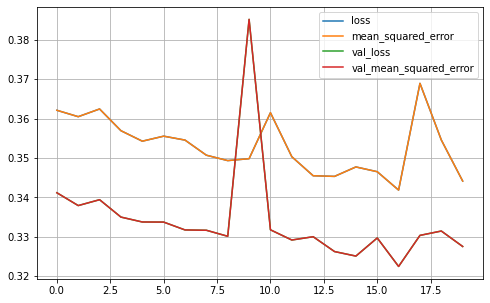

In [11]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)

In [12]:
#using keras functional api to build complex models

input_ = keras.layers.Input(shape = X_train.shape[1:])
hidden1 = keras.layers.Dense(30,activation="relu")(input_)
hidden2 = keras.layers.Dense(30,activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input_,hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_],outputs=[output])

model.compile(loss="mean_squared_error" , optimizer="adam",   metrics=[tf.keras.metrics.MeanSquaredError()])
history = model.fit(X_train,y_train,epochs=20,validation_data=(X_valid,y_valid))

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 2.2912 - mean_squared_error: 2.2912 - val_loss: 0.5521 - val_mean_squared_error: 0.5521
Epoch 2/20
363/363 [==============================] - 0s 870us/step - loss: 0.4937 - mean_squared_error: 0.4937 - val_loss: 0.4068 - val_mean_squared_error: 0.4068
Epoch 3/20
363/363 [==============================] - 0s 844us/step - loss: 0.4013 - mean_squared_error: 0.4013 - val_loss: 0.3780 - val_mean_squared_error: 0.3780
Epoch 4/20
363/363 [==============================] - 0s 830us/step - loss: 0.3907 - mean_squared_error: 0.3907 - val_loss: 0.3699 - val_mean_squared_error: 0.3699
Epoch 5/20
363/363 [==============================] - 0s 833us/step - loss: 0.3812 - mean_squared_error: 0.3812 - val_loss: 0.3500 - val_mean_squared_error: 0.3500
Epoch 6/20
363/363 [==============================] - 0s 812us/step - loss: 0.3699 - mean_squared_error: 0.3699 - val_loss: 0.3604 - val_mean_squared_error: 0.3604
Epoch 7/20
363/363

In [13]:
model.evaluate(X_test,y_test)

162/162 [==============================] - 0s 577us/step - loss: 0.3127 - mean_squared_error: 0.3127


[0.3126838505268097, 0.3126838505268097]

In [14]:
# sending subsets of features refer hands on machine learning page 310

input_A = keras.layers.Input(shape=[5],name="wide_input")
input_B = keras.layers.Input(shape=[6],name="deep_input")
hidden1 = keras.layers.Dense(30,activation="relu")(input_B)
hidden2 = keras.layers.Dense(30,activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A,hidden2])
output = keras.layers.Dense(1,name="output")(concat)
model = keras.Model(inputs=[input_A,input_B],outputs=[output])

model.compile(loss="mean_squared_error" , optimizer="adam",   metrics=[tf.keras.metrics.MeanSquaredError()])

X_train_A,X_train_B = X_train[:,:5],X_train[:,2:]
X_valid_A,X_valid_B = X_valid[:,:5],X_valid[:,2:]
X_test_A,X_test_B = X_test[:,:5],X_test[:,2:]
X_new_A,X_new_B = X_test_A[:3],X_test_B[:3]

history = model.fit((X_train_A,X_train_B),y_train,epochs=30,validation_data=((X_valid_A,X_valid_B),y_valid))

Epoch 1/30
363/363 [==============================] - 1s 1ms/step - loss: 2.1902 - mean_squared_error: 2.1902 - val_loss: 0.6222 - val_mean_squared_error: 0.6222
Epoch 2/30
363/363 [==============================] - 0s 944us/step - loss: 0.5707 - mean_squared_error: 0.5707 - val_loss: 0.4763 - val_mean_squared_error: 0.4763
Epoch 3/30
363/363 [==============================] - 0s 853us/step - loss: 0.4683 - mean_squared_error: 0.4683 - val_loss: 0.4390 - val_mean_squared_error: 0.4390
Epoch 4/30
363/363 [==============================] - 0s 876us/step - loss: 0.4493 - mean_squared_error: 0.4493 - val_loss: 0.4049 - val_mean_squared_error: 0.4049
Epoch 5/30
363/363 [==============================] - 0s 850us/step - loss: 0.3984 - mean_squared_error: 0.3984 - val_loss: 0.3690 - val_mean_squared_error: 0.3690
Epoch 6/30
363/363 [==============================] - 0s 844us/step - loss: 0.3861 - mean_squared_error: 0.3861 - val_loss: 0.3557 - val_mean_squared_error: 0.3557
Epoch 7/30
363/363

In [15]:
model.evaluate((X_test_A,X_test_B),y_test)

162/162 [==============================] - 0s 491us/step - loss: 0.3855 - mean_squared_error: 0.3855


[0.38554373383522034, 0.38554373383522034]

In [16]:
model.predict((X_new_A,X_new_B))

array([[1.254132 ],
       [2.3823137],
       [2.0839293]], dtype=float32)

In [17]:
y_test[:3]

array([1.64 , 1.998, 1.75 ])

In [18]:
#using an auxilary output for regulariztion page 312 in hands on machine learning


input_A = keras.layers.Input(shape=[5],name="wide_input")
input_B = keras.layers.Input(shape=[6],name="deep_input")
hidden1 = keras.layers.Dense(30,activation="relu")(input_B)
hidden2 = keras.layers.Dense(30,activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A,hidden2])
output = keras.layers.Dense(1,name="output")(concat)
aux_output = keras.layers.Dense(1,name="aux_output")(hidden2)
model = keras.Model(inputs = [input_A,input_B],outputs=[output,aux_output])

model.compile(loss=["mse","mse"],loss_weights=[0.9,0.1],optimizer="adam")

X_train_A,X_train_B = X_train[:,:5],X_train[:,2:]
X_valid_A,X_valid_B = X_valid[:,:5],X_valid[:,2:]
X_test_A,X_test_B = X_test[:,:5],X_test[:,2:]
X_new_A,X_new_B = X_test_A[:3],X_test_B[:3]

history = model.fit([X_train_A,X_train_B],[y_train,y_train],epochs=20,validation_data=([X_valid_A,X_valid_B],[y_valid,y_valid]))

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 2.0197 - output_loss: 1.9192 - aux_output_loss: 2.9246 - val_loss: 0.6387 - val_output_loss: 0.6033 - val_aux_output_loss: 0.9576
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5047 - output_loss: 0.4684 - aux_output_loss: 0.8316 - val_loss: 0.4513 - val_output_loss: 0.4227 - val_aux_output_loss: 0.7090
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4331 - output_loss: 0.4113 - aux_output_loss: 0.6295 - val_loss: 0.4256 - val_output_loss: 0.4043 - val_aux_output_loss: 0.6170
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4335 - output_loss: 0.4109 - aux_output_loss: 0.6370 - val_loss: 0.4205 - val_output_loss: 0.4057 - val_aux_output_loss: 0.5543
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4163 - output_loss: 0.4001 - aux_output_loss: 0.5621 - val_loss: 0.3816 - val_output_loss: 0.3677 - val_aux_

In [19]:
total_loss,main_loss,aux_loss = model.evaluate([X_test_A,X_test_B],[y_test,y_test])

162/162 [==============================] - 0s 691us/step - loss: 0.3489 - output_loss: 0.3425 - aux_output_loss: 0.4060


In [20]:
model.predict([X_new_A,X_new_B])

[array([[1.2759999],
        [2.3461738],
        [1.9932345]], dtype=float32),
 array([[1.2373835],
        [2.200038 ],
        [2.000543 ]], dtype=float32)]

In [21]:
#saving the model refer hands on machine learning page 314
model.save("californiamodel.h5")

In [22]:
# loading the model refer hands on machine learning page 315
models = keras.models.load_model("californiamodel.h5")

In [23]:
history1 = models.fit([X_train_A,X_train_B],[y_train,y_train],epochs=20,validation_data=([X_valid_A,X_valid_B],[y_valid,y_valid]))

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 0.3657 - output_loss: 0.3608 - aux_output_loss: 0.4091 - val_loss: 0.3114 - val_output_loss: 0.3036 - val_aux_output_loss: 0.3822
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3323 - output_loss: 0.3253 - aux_output_loss: 0.3950 - val_loss: 0.3136 - val_output_loss: 0.3062 - val_aux_output_loss: 0.3800
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3271 - output_loss: 0.3205 - aux_output_loss: 0.3865 - val_loss: 0.3121 - val_output_loss: 0.3045 - val_aux_output_loss: 0.3801
Epoch 4/20
363/363 [==============================] - 0s 928us/step - loss: 0.3248 - output_loss: 0.3185 - aux_output_loss: 0.3817 - val_loss: 0.3143 - val_output_loss: 0.3073 - val_aux_output_loss: 0.3774
Epoch 5/20
363/363 [==============================] - 0s 939us/step - loss: 0.3258 - output_loss: 0.3196 - aux_output_loss: 0.3814 - val_loss: 0.3090 - val_output_loss: 0.3023 - val_

In [24]:
model.evaluate([X_test_A,X_test_B],[y_test,y_test])

162/162 [==============================] - 0s 553us/step - loss: 0.3489 - output_loss: 0.3425 - aux_output_loss: 0.4060


[0.34887218475341797, 0.3425232470035553, 0.40601256489753723]

In [27]:
# fine tuning the parametres page 320 in hands on machine learning

def build_model(n_hidden=1,n_nuerons=30,learning_rate=3e-3,inputshape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=inputshape))
    for i in range(n_hidden):
        model.add(keras.layers.Dense(n_nuerons,activation="relu"))
    model.add(keras.layers.Dense(1))
    optimezer = keras.optimizers.SGD(lr=learning_rate)
    model.compile(loss="mse",optimizer=optimezer)
    return model

keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)
keras_reg.fit(X_train,y_train,epochs=100,validation_data=(X_valid,y_valid),callbacks=[keras.callbacks.EarlyStopping(patience=10)])
mse_test = keras_reg.score(X_test,y_test)

Epoch 1/100
363/363 [==============================] - 1s 917us/step - loss: 1.6675 - val_loss: 0.8251
Epoch 2/100
363/363 [==============================] - 0s 1ms/step - loss: 0.7113 - val_loss: 0.6636
Epoch 3/100
363/363 [==============================] - 0s 666us/step - loss: 0.6256 - val_loss: 0.5382
Epoch 4/100
363/363 [==============================] - 0s 667us/step - loss: 0.5306 - val_loss: 0.5046
Epoch 5/100
363/363 [==============================] - 0s 665us/step - loss: 0.5031 - val_loss: 0.4717
Epoch 6/100
363/363 [==============================] - 0s 738us/step - loss: 0.4825 - val_loss: 0.4513
Epoch 7/100
363/363 [==============================] - 0s 670us/step - loss: 0.4572 - val_loss: 0.4333
Epoch 8/100
363/363 [==============================] - 0s 649us/step - loss: 0.4416 - val_loss: 0.4344
Epoch 9/100
363/363 [==============================] - 0s 632us/step - loss: 0.4454 - val_loss: 0.4156
Epoch 10/100
363/363 [==============================] - 0s 665us/step - los

In [28]:
print(mse_test)

-0.34794503450393677


In [31]:
keras_reg.predict(x_new)

array([1.0393996, 2.5981898, 2.0838974], dtype=float32)

In [32]:
y_test[:3]

array([1.64 , 1.998, 1.75 ])

In [33]:
#randomized-search-cv page 321 in hands on machine learning

from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    "n_hidden":[0,1,2,3],
    "n_nuerons":np.arange(100),
    "learning_rate":reciprocal(3e-4,3e-2)
}


rnd_search_cv = RandomizedSearchCV(keras_reg,param_distribs,n_iter=10,cv=3)
rnd_search_cv.fit(X_train,y_train,epochs=100,validation_data=(X_valid,y_valid),callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/100
242/242 [==============================] - 0s 1ms/step - loss: 2.2497 - val_loss: 0.7263
Epoch 2/100
242/242 [==============================] - 0s 775us/step - loss: 0.6315 - val_loss: 0.6810
Epoch 3/100
242/242 [==============================] - 0s 734us/step - loss: 0.5879 - val_loss: 0.6039
Epoch 4/100
242/242 [==============================] - 0s 755us/step - loss: 0.5775 - val_loss: 0.5564
Epoch 5/100
242/242 [==============================] - 0s 743us/step - loss: 0.5498 - val_loss: 0.5217
Epoch 6/100
242/242 [==============================] - 0s 717us/step - loss: 0.5720 - val_loss: 0.5914
Epoch 7/100
242/242 [==============================] - 0s 802us/step - loss: 0.5459 - val_loss: 0.7602
Epoch 8/100
242/242 [==============================] - 0s 919us/step - loss: 0.5680 - val_loss: 0.6175
Epoch 9/100
242/242 [==============================] - 0s 803us/step - loss: 0.6064 - val_loss: 0.6490
Epoch 10/100
242/242 [==============================] - 0s 755us/step - los

242/242 [==============================] - 0s 772us/step - loss: 0.4623 - val_loss: 0.4541
Epoch 39/100
242/242 [==============================] - 0s 739us/step - loss: 0.4599 - val_loss: 0.4517
Epoch 40/100
242/242 [==============================] - 0s 728us/step - loss: 0.4611 - val_loss: 0.4495
Epoch 41/100
242/242 [==============================] - 0s 740us/step - loss: 0.4624 - val_loss: 0.4471
Epoch 42/100
242/242 [==============================] - 0s 757us/step - loss: 0.4447 - val_loss: 0.4456
Epoch 43/100
242/242 [==============================] - 0s 768us/step - loss: 0.4647 - val_loss: 0.4424
Epoch 44/100
242/242 [==============================] - 0s 748us/step - loss: 0.4342 - val_loss: 0.4408
Epoch 45/100
242/242 [==============================] - 0s 741us/step - loss: 0.4517 - val_loss: 0.4383
Epoch 46/100
242/242 [==============================] - 0s 711us/step - loss: 0.4414 - val_loss: 0.4367
Epoch 47/100
242/242 [==============================] - 0s 732us/step - loss:

242/242 [==============================] - 0s 928us/step - loss: 0.5774 - val_loss: 0.5626
Epoch 17/100
242/242 [==============================] - 0s 958us/step - loss: 0.5750 - val_loss: 0.5538
Epoch 18/100
242/242 [==============================] - 0s 777us/step - loss: 0.5658 - val_loss: 0.5449
Epoch 19/100
242/242 [==============================] - 0s 798us/step - loss: 0.5693 - val_loss: 0.5402
Epoch 20/100
242/242 [==============================] - 0s 784us/step - loss: 0.5691 - val_loss: 0.5322
Epoch 21/100
242/242 [==============================] - 0s 814us/step - loss: 0.5402 - val_loss: 0.5271
Epoch 22/100
242/242 [==============================] - 0s 758us/step - loss: 0.5475 - val_loss: 0.5222
Epoch 23/100
242/242 [==============================] - 0s 819us/step - loss: 0.5259 - val_loss: 0.5154
Epoch 24/100
242/242 [==============================] - 0s 757us/step - loss: 0.5364 - val_loss: 0.5102
Epoch 25/100
242/242 [==============================] - 0s 727us/step - loss:

Epoch 95/100
242/242 [==============================] - 0s 828us/step - loss: 0.4274 - val_loss: 0.3958
Epoch 96/100
242/242 [==============================] - 0s 765us/step - loss: 0.4253 - val_loss: 0.3953
Epoch 97/100
242/242 [==============================] - 0s 955us/step - loss: 0.4272 - val_loss: 0.3952
Epoch 98/100
242/242 [==============================] - 0s 794us/step - loss: 0.3990 - val_loss: 0.3950
Epoch 99/100
242/242 [==============================] - 0s 757us/step - loss: 0.4058 - val_loss: 0.3937
Epoch 100/100
121/121 [==============================] - 0s 430us/step - loss: 0.4226
Epoch 1/100
242/242 [==============================] - 1s 1ms/step - loss: 4.4292 - val_loss: 1.8095
Epoch 2/100
242/242 [==============================] - 0s 782us/step - loss: 1.5446 - val_loss: 1.0105
Epoch 3/100
242/242 [==============================] - 0s 742us/step - loss: 0.9319 - val_loss: 0.7954
Epoch 4/100
242/242 [==============================] - 0s 753us/step - loss: 0.7750 - v

Epoch 73/100
242/242 [==============================] - 0s 759us/step - loss: 0.4391 - val_loss: 0.3982
Epoch 74/100
242/242 [==============================] - 0s 766us/step - loss: 0.4374 - val_loss: 0.3977
Epoch 75/100
242/242 [==============================] - 0s 746us/step - loss: 0.4157 - val_loss: 0.3972
Epoch 76/100
242/242 [==============================] - 0s 757us/step - loss: 0.4024 - val_loss: 0.3960
Epoch 77/100
242/242 [==============================] - 0s 974us/step - loss: 0.4406 - val_loss: 0.3950
Epoch 78/100
242/242 [==============================] - 0s 790us/step - loss: 0.4249 - val_loss: 0.3945
Epoch 79/100
242/242 [==============================] - 0s 759us/step - loss: 0.4123 - val_loss: 0.3942
Epoch 80/100
242/242 [==============================] - 0s 756us/step - loss: 0.4198 - val_loss: 0.3935
Epoch 81/100
242/242 [==============================] - 0s 742us/step - loss: 0.4206 - val_loss: 0.3923
Epoch 82/100
242/242 [==============================] - 0s 764us

242/242 [==============================] - 0s 736us/step - loss: 0.3172 - val_loss: 0.3083
Epoch 52/100
242/242 [==============================] - 0s 746us/step - loss: 0.3137 - val_loss: 0.3039
Epoch 53/100
242/242 [==============================] - 0s 762us/step - loss: 0.3146 - val_loss: 0.3247
Epoch 54/100
242/242 [==============================] - 0s 744us/step - loss: 0.3051 - val_loss: 0.3071
Epoch 55/100
242/242 [==============================] - 0s 731us/step - loss: 0.3089 - val_loss: 0.3206
Epoch 56/100
242/242 [==============================] - 0s 741us/step - loss: 0.3014 - val_loss: 0.3065
Epoch 57/100
242/242 [==============================] - 0s 751us/step - loss: 0.3048 - val_loss: 0.3437
Epoch 58/100
242/242 [==============================] - 0s 893us/step - loss: 0.2982 - val_loss: 0.3071
Epoch 59/100
242/242 [==============================] - 0s 861us/step - loss: 0.3005 - val_loss: 0.3912
Epoch 60/100
242/242 [==============================] - 0s 762us/step - loss:

242/242 [==============================] - 0s 766us/step - loss: 0.3790 - val_loss: 0.3363
Epoch 21/100
242/242 [==============================] - 0s 776us/step - loss: 0.3529 - val_loss: 0.3357
Epoch 22/100
242/242 [==============================] - 0s 751us/step - loss: 0.4031 - val_loss: 0.3369
Epoch 23/100
242/242 [==============================] - 0s 750us/step - loss: 0.3547 - val_loss: 0.3229
Epoch 24/100
242/242 [==============================] - 0s 747us/step - loss: 0.3291 - val_loss: 0.3307
Epoch 25/100
242/242 [==============================] - 0s 759us/step - loss: 0.3516 - val_loss: 0.3202
Epoch 26/100
242/242 [==============================] - 0s 725us/step - loss: 0.3303 - val_loss: 0.3261
Epoch 27/100
242/242 [==============================] - 0s 743us/step - loss: 0.3156 - val_loss: 0.3268
Epoch 28/100
242/242 [==============================] - 0s 753us/step - loss: 0.3421 - val_loss: 0.3591
Epoch 29/100
242/242 [==============================] - 0s 815us/step - loss:

242/242 [==============================] - 0s 832us/step - loss: 1.5147 - val_loss: 0.5029
Epoch 5/100
242/242 [==============================] - 0s 736us/step - loss: 0.4468 - val_loss: 5.1206
Epoch 6/100
242/242 [==============================] - 0s 730us/step - loss: 0.5497 - val_loss: 17.7278
Epoch 7/100
242/242 [==============================] - 0s 740us/step - loss: nan - val_loss: nan
Epoch 8/100
242/242 [==============================] - 0s 763us/step - loss: nan - val_loss: nan
Epoch 9/100
242/242 [==============================] - 0s 770us/step - loss: nan - val_loss: nan
Epoch 10/100
242/242 [==============================] - 0s 727us/step - loss: nan - val_loss: nan
Epoch 11/100
242/242 [==============================] - 0s 766us/step - loss: nan - val_loss: nan
Epoch 12/100
121/121 [==============================] - 0s 450us/step - loss: nan
Epoch 1/100
242/242 [==============================] - 1s 1ms/step - loss: 0.9003 - val_loss: 0.8892
Epoch 2/100
242/242 [===========

242/242 [==============================] - 0s 824us/step - loss: 0.4592 - val_loss: 0.3730
Epoch 4/100
242/242 [==============================] - 0s 800us/step - loss: 0.3686 - val_loss: 0.3501
Epoch 5/100
242/242 [==============================] - 0s 778us/step - loss: 0.3534 - val_loss: 0.3182
Epoch 6/100
242/242 [==============================] - 0s 840us/step - loss: 0.3393 - val_loss: 0.3231
Epoch 7/100
242/242 [==============================] - 0s 789us/step - loss: 0.3437 - val_loss: 0.3168
Epoch 8/100
242/242 [==============================] - 0s 872us/step - loss: 0.3325 - val_loss: 0.3105
Epoch 9/100
242/242 [==============================] - 0s 875us/step - loss: 0.3162 - val_loss: 0.2979
Epoch 10/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3087 - val_loss: 0.3032
Epoch 11/100
242/242 [==============================] - 0s 824us/step - loss: 0.3152 - val_loss: 0.3029
Epoch 12/100
242/242 [==============================] - 0s 790us/step - loss: 0.3192 

242/242 [==============================] - 0s 795us/step - loss: 0.3165 - val_loss: 0.2964
Epoch 24/100
242/242 [==============================] - 0s 758us/step - loss: 0.3061 - val_loss: 0.3002
Epoch 25/100
242/242 [==============================] - 0s 783us/step - loss: 0.3131 - val_loss: 0.3080
Epoch 26/100
242/242 [==============================] - 0s 796us/step - loss: 0.2838 - val_loss: 0.2859
Epoch 27/100
242/242 [==============================] - 0s 790us/step - loss: 0.2913 - val_loss: 0.2941
Epoch 28/100
242/242 [==============================] - 0s 912us/step - loss: 0.3024 - val_loss: 0.3055
Epoch 29/100
242/242 [==============================] - 0s 1ms/step - loss: 0.2949 - val_loss: 0.3014
Epoch 30/100
242/242 [==============================] - 0s 769us/step - loss: 0.3193 - val_loss: 0.2844
Epoch 31/100
242/242 [==============================] - 0s 790us/step - loss: 0.3206 - val_loss: 0.2910
Epoch 32/100
242/242 [==============================] - 0s 790us/step - loss: 0

242/242 [==============================] - 0s 800us/step - loss: 0.2704 - val_loss: 0.2916
Epoch 50/100
242/242 [==============================] - 0s 794us/step - loss: 0.2815 - val_loss: 0.2718
Epoch 51/100
242/242 [==============================] - 0s 753us/step - loss: 0.2768 - val_loss: 0.2927
Epoch 52/100
242/242 [==============================] - 0s 809us/step - loss: 0.2796 - val_loss: 0.2788
Epoch 53/100
242/242 [==============================] - 0s 876us/step - loss: 0.2787 - val_loss: 0.2719
Epoch 54/100
242/242 [==============================] - 0s 976us/step - loss: 0.2743 - val_loss: 0.2922
Epoch 55/100
242/242 [==============================] - 0s 799us/step - loss: 0.2548 - val_loss: 0.2773
Epoch 56/100
242/242 [==============================] - 0s 781us/step - loss: 0.2696 - val_loss: 0.2942
Epoch 57/100
242/242 [==============================] - 0s 807us/step - loss: 0.2857 - val_loss: 0.2876
Epoch 58/100
242/242 [==============================] - 0s 801us/step - loss:

242/242 [==============================] - 0s 797us/step - loss: 0.2621 - val_loss: 0.3020
Epoch 68/100
242/242 [==============================] - 0s 809us/step - loss: 0.2579 - val_loss: 0.2706
Epoch 69/100
242/242 [==============================] - 0s 830us/step - loss: 0.2623 - val_loss: 0.3041
Epoch 70/100
242/242 [==============================] - 0s 1ms/step - loss: 0.2471 - val_loss: 0.2723
Epoch 71/100
242/242 [==============================] - 0s 830us/step - loss: 0.2580 - val_loss: 0.2834
Epoch 72/100
242/242 [==============================] - 0s 861us/step - loss: 0.2581 - val_loss: 0.2720
Epoch 73/100
242/242 [==============================] - 0s 833us/step - loss: 0.2511 - val_loss: 0.2711
Epoch 74/100
242/242 [==============================] - 0s 836us/step - loss: 0.2580 - val_loss: 0.2854
Epoch 75/100
242/242 [==============================] - 0s 816us/step - loss: 0.2628 - val_loss: 0.2774
Epoch 76/100
242/242 [==============================] - 0s 808us/step - loss: 0

Epoch 16/100
242/242 [==============================] - 0s 843us/step - loss: 0.3934 - val_loss: 0.3795
Epoch 17/100
242/242 [==============================] - 0s 833us/step - loss: 0.3871 - val_loss: 0.3759
Epoch 18/100
242/242 [==============================] - 0s 880us/step - loss: 0.3648 - val_loss: 0.3715
Epoch 19/100
242/242 [==============================] - 0s 861us/step - loss: 0.3906 - val_loss: 0.3677
Epoch 20/100
242/242 [==============================] - 0s 834us/step - loss: 0.3669 - val_loss: 0.3636
Epoch 21/100
242/242 [==============================] - 0s 838us/step - loss: 0.3794 - val_loss: 0.3611
Epoch 22/100
242/242 [==============================] - 0s 823us/step - loss: 0.3744 - val_loss: 0.3594
Epoch 23/100
242/242 [==============================] - 0s 860us/step - loss: 0.3728 - val_loss: 0.3593
Epoch 24/100
242/242 [==============================] - 0s 846us/step - loss: 0.3639 - val_loss: 0.3574
Epoch 25/100
242/242 [==============================] - 0s 822us

Epoch 95/100
242/242 [==============================] - 0s 903us/step - loss: 0.2882 - val_loss: 0.3104
Epoch 96/100
242/242 [==============================] - 0s 842us/step - loss: 0.3130 - val_loss: 0.3019
Epoch 97/100
242/242 [==============================] - 0s 830us/step - loss: 0.3010 - val_loss: 0.2999
Epoch 98/100
242/242 [==============================] - 0s 838us/step - loss: 0.3064 - val_loss: 0.2994
Epoch 99/100
242/242 [==============================] - 0s 855us/step - loss: 0.3038 - val_loss: 0.3046
Epoch 100/100
121/121 [==============================] - 0s 441us/step - loss: 0.3338
Epoch 1/100
242/242 [==============================] - 1s 1ms/step - loss: 2.8935 - val_loss: 0.7756
Epoch 2/100
242/242 [==============================] - 0s 867us/step - loss: 0.7010 - val_loss: 0.6394
Epoch 3/100
242/242 [==============================] - 0s 839us/step - loss: 0.6542 - val_loss: 0.5860
Epoch 4/100
242/242 [==============================] - 0s 849us/step - loss: 0.5977 - v

242/242 [==============================] - 0s 851us/step - loss: 0.3080 - val_loss: 0.3117
Epoch 74/100
242/242 [==============================] - 0s 852us/step - loss: 0.3013 - val_loss: 0.3130
Epoch 75/100
242/242 [==============================] - 0s 863us/step - loss: 0.3140 - val_loss: 0.3113
Epoch 76/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3108 - val_loss: 0.3098
Epoch 77/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3043 - val_loss: 0.3122
Epoch 78/100
242/242 [==============================] - 0s 915us/step - loss: 0.3066 - val_loss: 0.3072
Epoch 79/100
242/242 [==============================] - 0s 852us/step - loss: 0.2933 - val_loss: 0.3154
Epoch 80/100
242/242 [==============================] - 0s 853us/step - loss: 0.3067 - val_loss: 0.3099
Epoch 81/100
242/242 [==============================] - 0s 1ms/step - loss: 0.2965 - val_loss: 0.3080
Epoch 82/100
242/242 [==============================] - 0s 986us/step - loss: 0.307

242/242 [==============================] - 0s 923us/step - loss: 0.3582 - val_loss: 0.3343
Epoch 52/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3569 - val_loss: 0.3327
Epoch 53/100
242/242 [==============================] - 0s 866us/step - loss: 0.3342 - val_loss: 0.3331
Epoch 54/100
242/242 [==============================] - 0s 841us/step - loss: 0.3613 - val_loss: 0.3307
Epoch 55/100
242/242 [==============================] - 0s 883us/step - loss: 0.3450 - val_loss: 0.3368
Epoch 56/100
242/242 [==============================] - 0s 875us/step - loss: 0.3278 - val_loss: 0.3288
Epoch 57/100
242/242 [==============================] - 0s 907us/step - loss: 0.3216 - val_loss: 0.3303
Epoch 58/100
242/242 [==============================] - 0s 874us/step - loss: 0.3512 - val_loss: 0.3296
Epoch 59/100
242/242 [==============================] - 0s 889us/step - loss: 0.3550 - val_loss: 0.3301
Epoch 60/100
242/242 [==============================] - 0s 889us/step - loss: 0

242/242 [==============================] - 0s 760us/step - loss: 0.3547 - val_loss: 0.3451
Epoch 30/100
242/242 [==============================] - 0s 749us/step - loss: 0.3753 - val_loss: 0.3428
Epoch 31/100
242/242 [==============================] - 0s 742us/step - loss: 0.3423 - val_loss: 0.3503
Epoch 32/100
242/242 [==============================] - 0s 726us/step - loss: 0.3491 - val_loss: 0.3461
Epoch 33/100
242/242 [==============================] - 0s 768us/step - loss: 0.3390 - val_loss: 0.3385
Epoch 34/100
242/242 [==============================] - 0s 747us/step - loss: 0.3465 - val_loss: 0.3524
Epoch 35/100
242/242 [==============================] - 0s 742us/step - loss: 0.3387 - val_loss: 0.3382
Epoch 36/100
242/242 [==============================] - 0s 778us/step - loss: 0.3344 - val_loss: 0.3629
Epoch 37/100
242/242 [==============================] - 0s 739us/step - loss: 0.3450 - val_loss: 0.3523
Epoch 38/100
242/242 [==============================] - 0s 734us/step - loss:

242/242 [==============================] - 0s 792us/step - loss: 0.3618 - val_loss: 0.3245
Epoch 63/100
242/242 [==============================] - 0s 744us/step - loss: 0.3361 - val_loss: 0.3644
Epoch 64/100
242/242 [==============================] - 0s 741us/step - loss: 0.3245 - val_loss: 0.3236
Epoch 65/100
242/242 [==============================] - 0s 746us/step - loss: 0.3259 - val_loss: 0.3301
Epoch 66/100
242/242 [==============================] - 0s 740us/step - loss: 0.3386 - val_loss: 0.3260
Epoch 67/100
242/242 [==============================] - 0s 758us/step - loss: 0.3263 - val_loss: 0.3224
Epoch 68/100
242/242 [==============================] - 0s 759us/step - loss: 0.3409 - val_loss: 0.3229
Epoch 69/100
242/242 [==============================] - 0s 779us/step - loss: 0.3268 - val_loss: 0.3882
Epoch 70/100
242/242 [==============================] - 0s 752us/step - loss: 0.3496 - val_loss: 0.3247
Epoch 71/100
242/242 [==============================] - 0s 771us/step - loss:

242/242 [==============================] - 0s 869us/step - loss: 0.3529 - val_loss: 0.3284
Epoch 41/100
242/242 [==============================] - 0s 773us/step - loss: 0.3637 - val_loss: 0.3338
Epoch 42/100
242/242 [==============================] - 0s 982us/step - loss: 0.3500 - val_loss: 0.3318
Epoch 43/100
242/242 [==============================] - 0s 763us/step - loss: 0.3451 - val_loss: 0.3278
Epoch 44/100
242/242 [==============================] - 0s 716us/step - loss: 0.3577 - val_loss: 0.3278
Epoch 45/100
242/242 [==============================] - 0s 755us/step - loss: 0.3499 - val_loss: 0.3279
Epoch 46/100
242/242 [==============================] - 0s 734us/step - loss: 0.3752 - val_loss: 0.3261
Epoch 47/100
242/242 [==============================] - 0s 757us/step - loss: 0.3361 - val_loss: 0.3262
Epoch 48/100
242/242 [==============================] - ETA: 0s - loss: 0.328 - 0s 757us/step - loss: 0.3308 - val_loss: 0.3272
Epoch 49/100
242/242 [==============================]

Epoch 40/100
242/242 [==============================] - 0s 856us/step - loss: 0.2727 - val_loss: 0.3413
Epoch 41/100
242/242 [==============================] - 0s 946us/step - loss: 0.2666 - val_loss: 0.2962
Epoch 42/100
242/242 [==============================] - 0s 993us/step - loss: 0.2707 - val_loss: 0.2824
Epoch 43/100
242/242 [==============================] - 0s 843us/step - loss: 0.2675 - val_loss: 0.3263
Epoch 44/100
242/242 [==============================] - 0s 888us/step - loss: 0.2710 - val_loss: 0.2850
Epoch 45/100
121/121 [==============================] - 0s 424us/step - loss: 0.3181
Epoch 1/100
242/242 [==============================] - 1s 1ms/step - loss: 1.7939 - val_loss: 0.5164
Epoch 2/100
242/242 [==============================] - 0s 852us/step - loss: 0.4578 - val_loss: 0.4271
Epoch 3/100
242/242 [==============================] - 0s 834us/step - loss: 0.4244 - val_loss: 0.3905
Epoch 4/100
242/242 [==============================] - 0s 840us/step - loss: 0.3981 - va

242/242 [==============================] - 0s 838us/step - loss: 0.3311 - val_loss: 0.3289
Epoch 11/100
242/242 [==============================] - 0s 825us/step - loss: 0.3495 - val_loss: 0.3213
Epoch 12/100
242/242 [==============================] - 0s 845us/step - loss: 0.3574 - val_loss: 0.3203
Epoch 13/100
242/242 [==============================] - 0s 805us/step - loss: 0.3423 - val_loss: 0.3161
Epoch 14/100
242/242 [==============================] - 0s 824us/step - loss: 0.3597 - val_loss: 0.3162
Epoch 15/100
242/242 [==============================] - 0s 822us/step - loss: 0.3261 - val_loss: 0.3273
Epoch 16/100
242/242 [==============================] - 0s 831us/step - loss: 0.3332 - val_loss: 0.3196
Epoch 17/100
242/242 [==============================] - 0s 852us/step - loss: 0.3376 - val_loss: 0.3067
Epoch 18/100
242/242 [==============================] - 0s 819us/step - loss: 0.3021 - val_loss: 0.3013
Epoch 19/100
242/242 [==============================] - 0s 831us/step - loss:

242/242 [==============================] - 0s 779us/step - loss: 0.5308 - val_loss: 0.5102
Epoch 24/100
242/242 [==============================] - 0s 741us/step - loss: 0.5252 - val_loss: 0.5049
Epoch 25/100
242/242 [==============================] - 0s 742us/step - loss: 0.5117 - val_loss: 0.4998
Epoch 26/100
242/242 [==============================] - 0s 752us/step - loss: 0.4757 - val_loss: 0.4952
Epoch 27/100
242/242 [==============================] - 0s 770us/step - loss: 0.4961 - val_loss: 0.4907
Epoch 28/100
242/242 [==============================] - 0s 726us/step - loss: 0.5205 - val_loss: 0.4869
Epoch 29/100
242/242 [==============================] - 0s 772us/step - loss: 0.4936 - val_loss: 0.4834
Epoch 30/100
242/242 [==============================] - 0s 726us/step - loss: 0.4970 - val_loss: 0.4800
Epoch 31/100
242/242 [==============================] - 0s 757us/step - loss: 0.4930 - val_loss: 0.4766
Epoch 32/100
242/242 [==============================] - 0s 727us/step - loss:

242/242 [==============================] - 0s 1ms/step - loss: 5.0276 - val_loss: 2.2165
Epoch 2/100
242/242 [==============================] - 0s 744us/step - loss: 1.6867 - val_loss: 1.1542
Epoch 3/100
242/242 [==============================] - 0s 757us/step - loss: 1.0122 - val_loss: 0.8450
Epoch 4/100
242/242 [==============================] - 0s 755us/step - loss: 0.7874 - val_loss: 0.7331
Epoch 5/100
242/242 [==============================] - 0s 775us/step - loss: 0.6975 - val_loss: 0.6802
Epoch 6/100
242/242 [==============================] - 0s 759us/step - loss: 0.6794 - val_loss: 0.6488
Epoch 7/100
242/242 [==============================] - 0s 768us/step - loss: 0.6731 - val_loss: 0.6262
Epoch 8/100
242/242 [==============================] - 0s 785us/step - loss: 0.6500 - val_loss: 0.6083
Epoch 9/100
242/242 [==============================] - 0s 786us/step - loss: 0.6263 - val_loss: 0.5944
Epoch 10/100
242/242 [==============================] - 0s 752us/step - loss: 0.5972 - 

242/242 [==============================] - 0s 723us/step - loss: 0.4199 - val_loss: 0.4156
Epoch 81/100
242/242 [==============================] - 0s 747us/step - loss: 0.4235 - val_loss: 0.4141
Epoch 82/100
242/242 [==============================] - 0s 744us/step - loss: 0.4148 - val_loss: 0.4137
Epoch 83/100
242/242 [==============================] - 0s 730us/step - loss: 0.4567 - val_loss: 0.4129
Epoch 84/100
242/242 [==============================] - 0s 726us/step - loss: 0.4082 - val_loss: 0.4122
Epoch 85/100
242/242 [==============================] - 0s 737us/step - loss: 0.4443 - val_loss: 0.4110
Epoch 86/100
242/242 [==============================] - 0s 719us/step - loss: 0.4332 - val_loss: 0.4109
Epoch 87/100
242/242 [==============================] - 0s 737us/step - loss: 0.4424 - val_loss: 0.4105
Epoch 88/100
242/242 [==============================] - 0s 745us/step - loss: 0.4563 - val_loss: 0.4093
Epoch 89/100
242/242 [==============================] - 0s 716us/step - loss:

242/242 [==============================] - 0s 809us/step - loss: 0.4547 - val_loss: 0.4215
Epoch 59/100
242/242 [==============================] - 0s 928us/step - loss: 0.4437 - val_loss: 0.4208
Epoch 60/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4438 - val_loss: 0.4201
Epoch 61/100
242/242 [==============================] - 0s 952us/step - loss: 0.4595 - val_loss: 0.4189
Epoch 62/100
242/242 [==============================] - 0s 773us/step - loss: 0.4540 - val_loss: 0.4182
Epoch 63/100
242/242 [==============================] - 0s 770us/step - loss: 0.4220 - val_loss: 0.4174
Epoch 64/100
242/242 [==============================] - 0s 758us/step - loss: 0.4205 - val_loss: 0.4166
Epoch 65/100
242/242 [==============================] - 0s 734us/step - loss: 0.4464 - val_loss: 0.4159
Epoch 66/100
242/242 [==============================] - 0s 738us/step - loss: 0.4357 - val_loss: 0.4153
Epoch 67/100
242/242 [==============================] - 0s 744us/step - loss: 0

C:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [-1.29271046e+14 -4.13373619e-01 -3.64309301e-01             nan
 -2.99838275e-01 -3.22979639e-01 -3.24429383e-01 -3.60941599e-01
 -3.02069416e-01 -4.23749934e-01]
  warnings.warn(


RuntimeError: Cannot clone object <tensorflow.python.keras.wrappers.scikit_learn.KerasRegressor object at 0x000002BE5C709DF0>, as the constructor either does not set or modifies parameter learning_rate

In [34]:
rnd_search_cv.best_params_

{'learning_rate': 0.02388513238833371, 'n_hidden': 2, 'n_nuerons': 63}

In [35]:
rnd_search_cv.best_score_

-0.29983827471733093

In [38]:
def build_model(n_hidden=2,n_nuerons=63,learning_rate=0.02388513238833371,inputshape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=inputshape))
    for i in range(n_hidden):
        model.add(keras.layers.Dense(n_nuerons,activation="relu"))
    model.add(keras.layers.Dense(1))
    optimezer = keras.optimizers.SGD(lr=learning_rate)
    model.compile(loss="mse",optimizer=optimezer)
    return model

keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)
keras_reg.fit(X_train,y_train,epochs=100,validation_data=(X_valid,y_valid),callbacks=[keras.callbacks.EarlyStopping(patience=10)])
mse_test = keras_reg.score(X_test,y_test)

Epoch 1/100
363/363 [==============================] - 1s 1ms/step - loss: 1.1308 - val_loss: 1.0021
Epoch 2/100
363/363 [==============================] - 0s 703us/step - loss: 0.5195 - val_loss: 1.4611
Epoch 3/100
363/363 [==============================] - 0s 699us/step - loss: 0.4547 - val_loss: 0.3574
Epoch 4/100
363/363 [==============================] - 0s 786us/step - loss: 0.3769 - val_loss: 0.3255
Epoch 5/100
363/363 [==============================] - 0s 691us/step - loss: 0.3529 - val_loss: 0.3393
Epoch 6/100
363/363 [==============================] - 0s 872us/step - loss: 0.3510 - val_loss: 0.3247
Epoch 7/100
363/363 [==============================] - 0s 794us/step - loss: 0.3460 - val_loss: 0.3119
Epoch 8/100
363/363 [==============================] - 0s 698us/step - loss: 0.3300 - val_loss: 0.3102
Epoch 9/100
363/363 [==============================] - 0s 714us/step - loss: 0.3128 - val_loss: 0.3034
Epoch 10/100
363/363 [==============================] - 0s 691us/step - los